In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/maningmn1987/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [5]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC()

In [34]:
from sklearn.cross_validation import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state =3)

In [45]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
from sklearn import metrics

In [47]:
predicted  = model.predict(X_test)
expected = Y_test

In [48]:
print metrics.accuracy_score(expected, predicted)

0.966666666667


In [49]:
from sklearn import svm

In [50]:
X = iris.data[:,:2]
Y = iris.target

In [51]:
C = 1.0

In [52]:
svc = svm.SVC(kernel = 'linear', C = C).fit(X,Y)

In [57]:
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X,Y)

In [56]:
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = C).fit(X,Y)

In [76]:
lin_svc = svm.LinearSVC().fit(X,Y)

In [61]:
h = 0.02
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [62]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [66]:
print x_min
print x_max

print y_min
print y_max

3.3
8.9
1.0
5.4


In [67]:
xx

array([[ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88]])

In [74]:
a = np.array([1,2,3])
b = np.array([3,4,5])
np.c_[a,b]

array([[1, 3],
       [2, 4],
       [3, 5]])

In [69]:
title = ['SVC with linear kernel', 'LinearSVC(linear kernel)',
        'SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel']

[1 1 1 ..., 2 2 2]
[1 1 1 ..., 2 2 2]
[2 2 2 ..., 2 2 2]
[0 0 0 ..., 2 2 2]


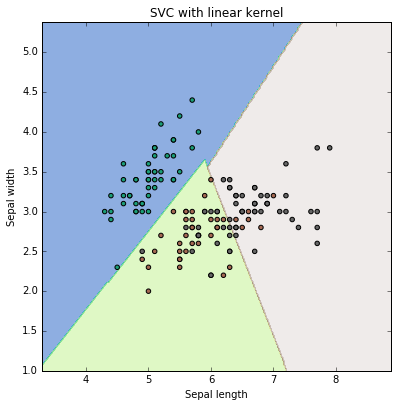

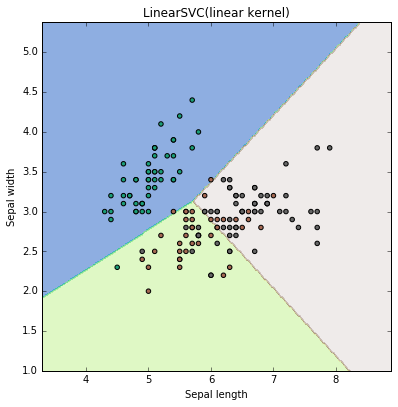

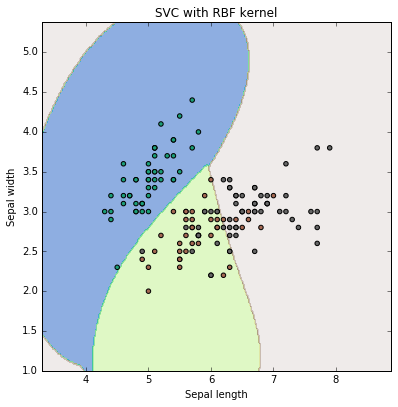

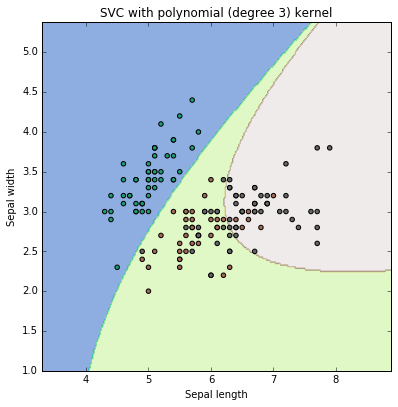

In [85]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize = (15,15))
    
    plt.subplot(2,2,i + 1)
    #space between plot
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print Z
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap = plt.cm.terrain, alpha = 0.5)
    plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title[i])